# Building Neural Networks 3 different ways with different levels of customization

## Setup

In [337]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("FashionMNIST-NN-Optimization"):
    raise ValueError("Please change working directory to 'path/FashionMNIST-NN-Optimization' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/FashionMNIST-NN-Optimization


In [338]:
!pip install -r requirements.txt

In [339]:
import zipfile
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Fetch data

In [340]:
with zipfile.ZipFile("data/fashion_mnist_data.zip", 'r') as zip_ref:
    zip_ref.extractall("data/")

In [341]:
fmnist_train = pd.read_csv("data/fashion_mnist_train.csv")
fmnist_test = pd.read_csv("data/fashion_mnist_test.csv")

## Separating labels and data splitting

In [342]:
fmnist_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [343]:
fmnist_train.notnull().any(axis=1).value_counts()

True    60000
Name: count, dtype: int64

In [344]:
y_train_valid = fmnist_train["label"]
X_train_valid = fmnist_train.drop("label", axis=1)
y_test = fmnist_test["label"]
X_test = fmnist_test.drop("label", axis=1)

In [345]:
len(X_train_valid)

60000

In [346]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=1/12, stratify=y_train_valid)

In [347]:
len(X_train), len(X_valid)

(55000, 5000)

In [348]:
y_train.value_counts()

label
9    5500
3    5500
5    5500
2    5500
7    5500
6    5500
1    5500
4    5500
8    5500
0    5500
Name: count, dtype: int64

In [349]:
fmnist_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [350]:
labels = np.array(["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])

## Scaling data

In [351]:
X_train /= 255
X_valid /= 255
X_test /= 255

## Dataset analysis

In [352]:
X_train.shape

(55000, 784)

In [353]:
input_shape = X_train.shape[1]
img_len = int(np.sqrt(input_shape))

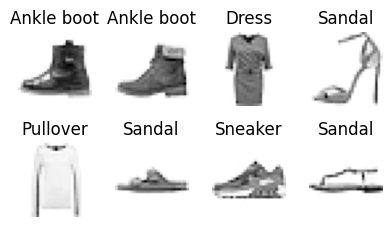

In [354]:
n_rows = 2
n_cols = 4
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        image = X_train.iloc[index].to_numpy().reshape(img_len, img_len)
        plt.imshow(image, cmap="Greys")
        plt.axis('off')
        plt.title(labels[y_train.iloc[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Sequential API

In [328]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(input_shape, )),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [329]:
X_train.shape

(55000, 784)

## Model analysis

In [330]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

In [331]:
model.layers

[<Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [332]:
dense = model.get_layer("dense")
weights, biases = dense.get_weights()

weights

array([[-0.02149099, -0.05777131, -0.02594555, ..., -0.04265597,
        -0.03390589, -0.07239945],
       [ 0.08168505, -0.04039694, -0.04435979, ...,  0.05989979,
         0.01286464, -0.02483614],
       [ 0.0131612 ,  0.00151794,  0.00956554, ..., -0.06157054,
         0.06017075,  0.07872967],
       ...,
       [ 0.00935146, -0.01368433, -0.02749144, ...,  0.02967754,
        -0.02201224,  0.04422314],
       [-0.04510201, -0.03496494,  0.04294954, ..., -0.03059192,
        -0.06508724, -0.03966684],
       [-0.01160387, -0.06579396, -0.04267449, ...,  0.06785052,
         0.04709698,  0.02365576]], dtype=float32)

In [333]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)